In [190]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

In [191]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [1]:
pwd

'/home/grace/Documents/python/ttc_exclusions/notebooks'

In [2]:
raw_dir = '/home/grace/Documents/python/ttc_exclusions/data/raw'
processed_dir = '/home/grace/Documents/python/ttc_exclusions/data/processed/'
figures_dir = '/home/grace/Documents/python/ttc_exclusions/reports/figures/'

In [194]:
xls = pd.ExcelFile(raw_dir+'Exclusions_Dashboard_100619.xlsx')

In [195]:
xls.sheet_names

['Worksheet1', 'Sheet1']

In [196]:
exclusions = xls.parse('Worksheet1')

In [197]:
exclusions.shape

(231, 32)

In [198]:
exclusions.head()

,INPUT,FOUND_BY,DTXSID,PREFERRED_NAME,CASRN,SMILES,CAS,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,...,TOX21SL,TOXCAST_PH1V2,TOXCAST_V3,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015
0,1327-53-3,CAS-RN,DTXSID0020103,Arsenic oxide (As2O3),1327-53-3,[O--].[O--].[O--].[As+3].[As+3],1327-53-3,Risk assessment requires compound-specific tox...,Q1Y,NaN,...,Y,-,Y,-,-,-,-,-,-,-
1,34031-32-8,CAS-RN,DTXSID4020115,Auranofin,34031-32-8,CCP(CC)(CC)=[Au]S[C@@H]1O[C@H](COC(C)=O)[C@@H]...,34031-32-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,...,Y,-,Y,-,-,-,-,-,-,-
2,26628-22-8,CAS-RN,DTXSID8020121,Sodium azide,26628-22-8,[Na+].[N-]=[N+]=[N-],26628-22-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,...,Y,-,Y,Y,-,-,Y,Y,-,-
3,10326-27-9,CAS-RN,DTXSID2020131,Barium chloride dihydrate,10326-27-9,O.O.[Cl-].[Cl-].[Ba++],10326-27-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,...,Y,-,Y,-,-,-,Y,-,-,-
4,56-35-9,CAS-RN,DTXSID9020166,Bis(tributyltin)oxide,56-35-9,CCCC[Sn](CCCC)(CCCC)O[Sn](CCCC)(CCCC)CCCC,56-35-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,...,Y,-,Y,-,-,-,Y,-,-,-


In [199]:
exclusions['SMILES'][200]

'CCN(N=O)C(N)=O'

In [200]:
metal_elements = ['Ma', 'Mg', 'K', 'Ca', 'Mn', 'Fe', 'Cu', 'Zn', 'Co', 'Ni', 'Cr', 'Hg', 'Pb', 'V', 'Al', 'Ag', 'Cd', 'B', 'Ti', 'Se', 'Sn', 'Sb', 'Be', 'Zr', 'Nb', 'Mo', 'Te', 'Ba', 'W', 'Au', 'Bi']

In [201]:
metal_dict = {'Na': 11 , 'Mg': 12, 'K':19, 'Ca':20, 'Mn':25, 'Fe':26, 'Cu':29, 'Zn':30, 'Co':27, 'Ni':28, 'Cr':24, 'Hg':80, 'Pb':82, 'V':23, 'Al':13, 'Ag':47, 'Cd':48, 'B':5, 'Ti':22, 'Se':34, 'Sn':50, 'Sb':51, 'Be':4, 'Zr':40, 'Nb':41, 'Mo':42, 'Te':52, 'Ba':56, 'W':74, 'Au':79, 'Bi':83}

In [202]:
from rdkit import Chem
def heavyweight_has_b_atom(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False
    return any(atom for atom in mol.GetAtoms() if atom.GetAtomicNum() == metal_dict['B'])

In [203]:
heavyweight_has_b_atom('c1ccccc1B')

True

In [204]:
def _test_has_br(has_bromine):
    for smiles in ('Br', '[Br]', 'BrCCC', 'c1ccccc1Br'):
        assert has_bromine(smiles), smiles
    for smiles in ('B', 'c1ccccc1B', 'B[Cr]'):
        assert not has_bromine(smiles, smiles)

In [205]:
def test_has_br():
    _test_has_br(heavyweight_has_br_atom)

In [206]:
heavyweight_has_br_atom('CCCCBr')

True

In [207]:
def has_Cu_atom(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol is None:
        return False
    return any(atom for atom in mol.GetAtoms() if atom.GetAtomicNum() == 29)
    

In [208]:
def has_metal_atom(smiles):
    metal_dict = {'Na': 11 , 'Mg': 12, 'K':19, 'Ca':20, 'Mn':25, 'Fe':26, 'Cu':29, 'Zn':30, 'Co':27, 'Ni':28, 'As': 33, 'Cr':24, 'Hg':80, 'Pb':82, 'V':23, 'Al':13, 'Ag':47, 'Cd':48, 'B':5, 'Ti': 22, 'Se': 34, 'Sn': 50, 'Sb':51, 'Be': 4, 'Zr': 40, 'Nb': 41, 'Mo': 42, 'Te':52, 'Ba':56, 'W':74, 'Au': 79, 'Bi': 83}
    essential_metal_dict = {'Na': 11 , 'Mg': 12, 'K':19, 'Ca':20, 'P':15, 'Mn':25, 'Fe':26, 'Cu':29, 'Zn':30, 'Co':27, 'Ni':28}
    mol = Chem.MolFromSmiles(smiles)
    if mol  is None:
        return False
    return any(atom for atom in mol.GetAtoms() if atom.GetAtomicNum() in list(metal_dict.values()))

In [209]:
len([has_metal_atom(e) for e in exclusions['SMILES']])

RDKit ERROR: [15:36:26] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [15:36:26] Explicit valence for atom # 0 O, 3, is greater than permitted


231

In [210]:
len(exclusions['SMILES'])

231

In [211]:
exclusions['Tag'].value_counts()

Q1Y        184
HPC         35
Steroid     12
Name: Tag, dtype: int64

In [212]:
metals = []
for x in exclusions['SMILES']:
    res = has_metal_atom(x)
    metals.append(res)
exclusions['Inorganic_filter'] = metals

RDKit ERROR: [15:37:16] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [15:37:16] Explicit valence for atom # 0 O, 3, is greater than permitted


In [213]:
exclusions['Inorganic_filter'].unique()

array([ True, False])

In [214]:
exclusions['Tag'].unique()

array(['Q1Y', 'Steroid', 'HPC'], dtype=object)

In [215]:
exclusions['Inorganic_filter'].value_counts()

True     126
False    105
Name: Inorganic_filter, dtype: int64

In [216]:
tag_num = []
for x in exclusions['Tag']:
    if x == 'Q1Y':
        tag_num.append(1)
    if x == 'Steroid':
        tag_num.append(2)
    if x == 'HPC':
        tag_num.append(3)
exclusions['Tag_numeric'] = tag_num      

In [217]:
inorg_num = []
for x in exclusions['Inorganic_filter']:
    if x == False:
        inorg_num.append(0)
    if x == True:
        inorg_num.append(1)
exclusions['inorg_numeric'] = inorg_num 

In [218]:
exclusions.columns

Index(['INPUT', 'FOUND_BY', 'DTXSID', 'PREFERRED_NAME', 'CASRN', 'SMILES',
       'CAS', 'Kroes.TTC.decision.tree.x',
       'Kroes.TTC.decision.tree.explanation.x', 'New.decision.tree', 'Tag',
       'AVERAGE_MASS', 'TOXVAL_DATA', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL', 'QSAR_READY_SMILES', 'IRIS_LINK',
       'PPRTV_LINK', 'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'TOX21SL', 'TOXCAST_PH1V2',
       'TOXCAST_V3', 'TOXCAST', 'EDSP21LIST1', 'EDSP21LIST2', 'EDSPUOC',
       'ERMODEL', 'WETMORE2012', 'WETMORE2015', 'Inorganic_filter',
       'Tag_numeric', 'inorg_numeric'],
      dtype='object')

In [219]:
mylst = ['DTXSID', 'PREFERRED_NAME', 'CASRN', 
       'Kroes.TTC.decision.tree.x',
       'Kroes.TTC.decision.tree.explanation.x', 'New.decision.tree', 'Tag',
       'Inorganic_filter',
       'Tag_numeric', 'inorg_numeric','SMILES','QSAR_READY_SMILES','AVERAGE_MASS', 'TOXVAL_DATA', 'TOXCAST_PERCENT_ACTIVE',
       'TOXCAST_NUMBER_OF_ASSAYS/TOTAL',  'IRIS_LINK',
       'PPRTV_LINK', 'OCTANOL_WATER_PARTITION_LOGP_OPERA_PRED',
       'MELTING_POINT_DEGC_OPERA_PRED', 'VAPOR_PRESSURE_MMHG_OPERA_PRED',
       'WATER_SOLUBILITY_MOL/L_OPERA_PRED', 'TOX21SL', 'TOXCAST_PH1V2',
       'TOXCAST_V3', 'TOXCAST', 'EDSP21LIST1', 'EDSP21LIST2', 'EDSPUOC',
       'ERMODEL', 'WETMORE2012', 'WETMORE2015']

In [220]:
exclusions = exclusions[mylst]

In [221]:
exclusions

,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,TOX21SL,TOXCAST_PH1V2,TOXCAST_V3,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015
0,DTXSID0020103,Arsenic oxide (As2O3),1327-53-3,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,-,-,-,-,-,-,-
1,DTXSID4020115,Auranofin,34031-32-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,-,-,-,-,-,-,-
2,DTXSID8020121,Sodium azide,26628-22-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,Y,-,-,Y,Y,-,-
3,DTXSID2020131,Barium chloride dihydrate,10326-27-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,-,-,-,Y,-,-,-
4,DTXSID9020166,Bis(tributyltin)oxide,56-35-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,-,-,-,Y,-,-,-
5,DTXSID2020181,Bismuth oxychloride,7787-59-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,-,-,-,-,-,-,-
6,DTXSID1020194,Boric acid,10043-35-3,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,Y,Y,Y,-,-,Y,Y,-,-
7,DTXSID6020226,Cadmium chloride,10108-64-2,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,Y,-,-,-,-,-,-
8,DTXSID5020235,Calcium chloride,10043-52-4,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,-,-,-,Y,-,-,-
9,DTXSID4020246,Carbarsone,121-59-5,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,-,Y,-,-,-,-,-,-,-


In [222]:
from sklearn.metrics import classification_report, precision_recall_fscore_support
from sklearn.metrics import confusion_matrix

In [223]:
print(confusion_matrix(exclusions['inorg_numeric'], exclusions['Tag_numeric']))

[[  0  58  12  35]
 [  0 126   0   0]
 [  0   0   0   0]
 [  0   0   0   0]]


In [224]:
exclusions[(exclusions['Tag_numeric'] == 1) & (exclusions['inorg_numeric'] == 0)]


,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,TOX21SL,TOXCAST_PH1V2,TOXCAST_V3,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015
14,DTXSID6020694,Hexamethylphosphoramide,680-31-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,Y,-,-,Y,-,-,-
17,DTXSID5020815,Metepa,57-39-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,Y,-,-,Y,-,-,-
28,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",1746-01-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,-,-,-,Y,-,-,-
29,DTXSID5021330,Tetrakis(hydroxymethyl)phosphonium chloride,124-64-1,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,Y,-,-,Y,-,-,-
30,DTXSID0021331,Tetrakis(hydroxymethyl)phosphonium sulfate,55566-30-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,Y,-,-,Y,-,-,-
31,DTXSID0021339,Thiotepa,52-24-4,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,Y,-,-,Y,-,-,-
36,DTXSID2022121,Triphenylphosphine oxide,791-28-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,Y,-,-,Y,-,-,-
38,DTXSID7022174,EPN,2104-64-5,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,Y,-,-,Y,Y,-,Y
39,DTXSID8022585,Amifostine,20537-88-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,-,Y,-,-,-,-,-,-,-
42,DTXSID1024174,Tribufos,78-48-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,Y,Y,Y,-,-,Y,Y,Y,-


Error for RDKit parsing misses 1 Au and 1 Zn substance - so these are incorrectly identified as not inorganics

In [168]:
#exclusions[exclusions['DTXSID'] == 'DTXSID5046013']['SMILES'].tolist()
#has_metal_atom('[H][O]1[Au+][S-]C2O[C@H](CO)[C@@H](O)[C@H](O)[C@@]12[H]')
#exclusions[exclusions['DTXSID'] == 'DTXSID7026314']['SMILES'].tolist()
has_metal_atom('[O-]1N2C=CC=CC2=[S][Zn++]11[O-]N2C=CC=CC2=[S]1')

RDKit ERROR: [13:47:16] Explicit valence for atom # 0 O, 3, is greater than permitted


False

In [231]:
exclusions[(exclusions['Tag_numeric'] == 1) & (exclusions['inorg_numeric'] == 1)]

,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,TOXCAST_PH1V2,TOXCAST_V3,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015,P_subs
0,DTXSID0020103,Arsenic oxide (As2O3),1327-53-3,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,-,-,-,-,False
1,DTXSID4020115,Auranofin,34031-32-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,-,-,-,-,True
2,DTXSID8020121,Sodium azide,26628-22-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,Y,-,-,Y,Y,-,-,False
3,DTXSID2020131,Barium chloride dihydrate,10326-27-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,Y,-,-,-,False
4,DTXSID9020166,Bis(tributyltin)oxide,56-35-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,Y,-,-,-,False
5,DTXSID2020181,Bismuth oxychloride,7787-59-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,-,-,-,-,False
6,DTXSID1020194,Boric acid,10043-35-3,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,Y,Y,Y,-,-,Y,Y,-,-,False
7,DTXSID6020226,Cadmium chloride,10108-64-2,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,Y,-,-,-,-,-,-,False
8,DTXSID5020235,Calcium chloride,10043-52-4,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,Y,-,-,-,False
9,DTXSID4020246,Carbarsone,121-59-5,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,-,-,-,-,False


In [226]:
exclusions['inorg_numeric'].value_counts()

1    126
0    105
Name: inorg_numeric, dtype: int64

In [227]:
def has_P_atom(smiles):
    #metal_dict = {'As': 33, 'Na': 11 , 'Mg': 12, 'K':19, 'Ca':20, 'P':15, 'Mn':25, 'Fe':26, 'Cu':29, 'Zn':30, 'Co':27, 'Ni':28, 'Cr':24, 'Hg':80, 'Pb':82, 'V':23, 'Al':13, 'Ag':47, 'Cd':48, 'B':5, 'Ti': 22, 'Se': 34, 'Sn': 50, 'Sb':51, 'Be': 4, 'Zr': 40, 'Nb': 41, 'Mo': 42, 'Te':52, 'Ba':56, 'W':74, 'Au': 79, 'Bi': 83}
    mol = Chem.MolFromSmiles(smiles)
    if mol  is None:
        return False
    return any(atom for atom in mol.GetAtoms() if atom.GetAtomicNum() == 15)

In [228]:
psubs= []
for x in exclusions['SMILES']:
    res = has_P_atom(x)
    psubs.append(res)
exclusions['P_subs'] = psubs

RDKit ERROR: [15:40:05] Explicit valence for atom # 0 O, 3, is greater than permitted
RDKit ERROR: [15:40:05] Explicit valence for atom # 0 O, 3, is greater than permitted


In [245]:
#P containing but not inorganics and Q1Y
# are there specific features that would characterise these
onlyp = exclusions[(exclusions['Tag_numeric'] == 1) & (exclusions['P_subs'] == True) & (exclusions['inorg_numeric'] == 0)]
len(onlyp)

51

In [246]:
onlyp

,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,TOXCAST_PH1V2,TOXCAST_V3,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015,P_subs
14,DTXSID6020694,Hexamethylphosphoramide,680-31-9,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,Y,-,-,Y,-,-,-,True
17,DTXSID5020815,Metepa,57-39-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,Y,-,-,Y,-,-,-,True
29,DTXSID5021330,Tetrakis(hydroxymethyl)phosphonium chloride,124-64-1,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,Y,-,-,Y,-,-,-,True
30,DTXSID0021331,Tetrakis(hydroxymethyl)phosphonium sulfate,55566-30-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,Y,-,-,Y,-,-,-,True
31,DTXSID0021339,Thiotepa,52-24-4,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,Y,-,-,Y,-,-,-,True
36,DTXSID2022121,Triphenylphosphine oxide,791-28-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,Y,-,-,Y,-,-,-,True
38,DTXSID7022174,EPN,2104-64-5,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,Y,-,-,Y,Y,-,Y,True
39,DTXSID8022585,Amifostine,20537-88-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,-,-,-,-,-,-,-,True
42,DTXSID1024174,Tribufos,78-48-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,Y,Y,Y,-,-,Y,Y,Y,-,True
43,DTXSID5024263,Phosphoric acid,7664-38-2,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,Y,-,-,Y,Y,-,-,True


In [248]:
#inorganics only but excluding any additional P
inorgs = exclusions[(exclusions['Tag_numeric'] == 1) & (exclusions['inorg_numeric'] == 1) & (exclusions['P_subs'] == False)]
len(inorgs)

123

In [251]:
# inorg and P
exclusions[(exclusions['Tag_numeric'] == 1) & (exclusions['inorg_numeric'] == 1) & (exclusions['P_subs'] == True)]

,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,TOXCAST_PH1V2,TOXCAST_V3,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015,P_subs
1,DTXSID4020115,Auranofin,34031-32-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,-,-,-,-,True
116,DTXSID9042465,Tetrasodium pyrophosphate,7722-88-5,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,-,-,-,Y,-,-,-,True
134,DTXSID9044798,Sodium bis(2-methylpropyl)phosphinodithioate,13360-78-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,True,1,1,...,-,Y,Y,-,-,Y,-,-,-,True


In [255]:
#inorgs (tiered to include P which were not counted previously)
inorgs_all = exclusions[(exclusions['Tag_numeric'] == 1) & (exclusions['inorg_numeric'] == 1)]
len(inorgs_all)

126

In [258]:
#remaining Q1Y
remaining = exclusions[(exclusions['Tag_numeric'] == 1) & (exclusions['inorg_numeric'] == 0) & (exclusions['P_subs'] == False)]
len(remaining)

7

In [233]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(processed_dir+'exclusions_110619.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
exclusions.to_excel(writer, sheet_name='with_tags')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [260]:
remaining.drop([58,140], inplace = True)

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [261]:
remaining

,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,TOXCAST_PH1V2,TOXCAST_V3,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015,P_subs
28,DTXSID2021315,"2,3,7,8-Tetrachlorodibenzo-p-dioxin",1746-01-6,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,-,-,-,Y,-,-,-,False
85,DTXSID2032180,"2,2',4,4',5,5'-Hexachlorobiphenyl",35065-27-1,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,-,-,-,-,-,-,-,False
124,DTXSID4044533,"2,2'-Dichlorobiphenyl",13029-08-8,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,Y,-,-,-,Y,-,-,-,False
160,DTXSID3040302,"2,2',4,4',6,6'-Hexachlorobiphenyl",33979-03-2,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,-,-,-,-,-,-,-,-,False
161,DTXSID5022514,"3,3',4,4'-Tetrachlorobiphenyl",32598-13-3,Risk assessment requires compound-specific tox...,Q1Y,NaN,Q1Y,False,1,0,...,-,-,-,-,-,Y,-,-,-,False


In [263]:
from rdkit.Chem import rdFMCS


In [264]:
remaining['SMILES']

28       ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl
85       ClC1=CC(Cl)=C(C=C1Cl)C1=CC(Cl)=C(Cl)C=C1Cl
124                  ClC1=C(C=CC=C1)C1=C(Cl)C=CC=C1
160    ClC1=CC(Cl)=C(C(Cl)=C1)C1=C(Cl)C=C(Cl)C=C1Cl
161          ClC1=C(Cl)C=C(C=C1)C1=CC(Cl)=C(Cl)C=C1
Name: SMILES, dtype: object

In [265]:
remaining_dict = { k:v for (k,v) in zip(remaining['DTXSID'], remaining['SMILES'])}
remaining_smiles = {k : Chem.MolFromSmiles(v) for k,v in remaining_dict.items()}

In [268]:
res = rdFMCS.FindMCS(list(remaining_smiles.values()))

In [271]:
remaining_mcs = res.smartsString

In [277]:
remaining_mcs

'[#17]-[#6]1:[#6]:[#6]:[#6]:[#6]:[#6]:1'

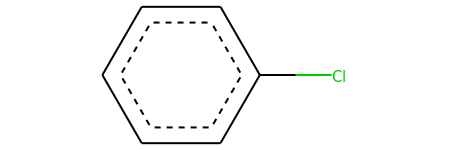

In [273]:
Chem.MolFromSmarts(remaining_mcs)

In [274]:
from rdkit.Chem import MCS

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  """Entry point for launching an IPython kernel.


In [275]:
MCS.FindMCS(list(remaining_smiles.values()))

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: The rdkit.Chem.MCS module is deprecated; please use rdkit.Chem.rdFMCS instead.
  """Entry point for launching an IPython kernel.


MCSResult(numAtoms=7, numBonds=7, smarts='[Cl]-[#6]:1:[#6]:[#6]:[#6]:[#6]:[#6]:1', completed=1)

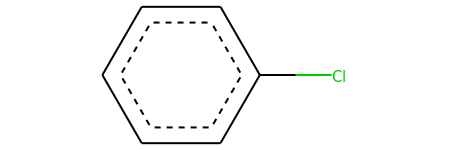

In [278]:
Chem.MolFromSmarts('[Cl]-[#6]:1:[#6]:[#6]:[#6]:[#6]:[#6]:1')

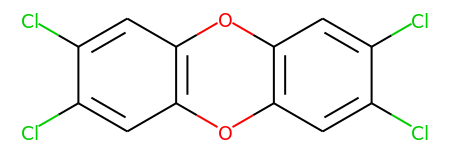

In [279]:
Chem.MolFromSmiles('ClC1=CC2=C(OC3=C(O2)C=C(Cl)C(Cl)=C3)C=C1Cl')

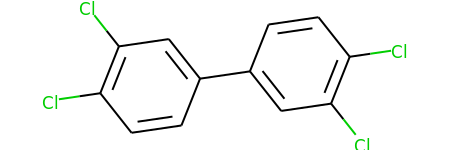

In [280]:
Chem.MolFromSmiles('ClC1=C(Cl)C=C(C=C1)C1=CC(Cl)=C(Cl)C=C1')

In [281]:
remaining.drop([28], inplace = True)

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [284]:
remaining2_dict = { k:v for (k,v) in zip(remaining['DTXSID'], remaining['SMILES'])}
remaining2_smiles = {k : Chem.MolFromSmiles(v) for k,v in remaining2_dict.items()}

In [286]:
res2 = rdFMCS.FindMCS(list(remaining2_smiles.values()))

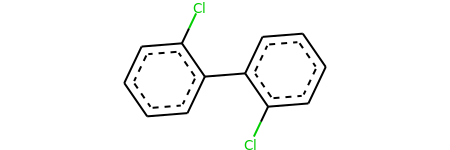

In [324]:
Chem.MolFromSmarts(rdFMCS.FindMCS(list(remaining2_smiles.values()), threshold = 0.75).smartsString)

In [302]:
help(rdFMCS.FindMCS)

Help on built-in function FindMCS in module rdkit.Chem.rdFMCS:

FindMCS(...)
    FindMCS( (AtomPairsParameters)mols [, (bool)maximizeBonds=True [, (float)threshold=1.0 [, (int)timeout=3600 [, (bool)verbose=False [, (bool)matchValences=False [, (bool)ringMatchesRingOnly=False [, (bool)completeRingsOnly=False [, (bool)matchChiralTag=False [, (AtomCompare)atomCompare=rdkit.Chem.rdFMCS.AtomCompare.CompareElements [, (BondCompare)bondCompare=rdkit.Chem.rdFMCS.BondCompare.CompareOrder [, (str)seedSmarts='']]]]]]]]]]]) -> MCSResult :
        Find the MCS for a set of molecules
    
        C++ signature :
            RDKit::MCSResult* FindMCS(boost::python::api::object [,bool=True [,double=1.0 [,unsigned int=3600 [,bool=False [,bool=False [,bool=False [,bool=False [,bool=False [,RDKit::AtomComparator=rdkit.Chem.rdFMCS.AtomCompare.CompareElements [,RDKit::BondComparator=rdkit.Chem.rdFMCS.BondCompare.CompareOrder [,std::__cxx11::basic_string<char, std::char_traits<char>, std::allocator<char> >=

In [287]:
remaining2_mcs = res2.smartsString

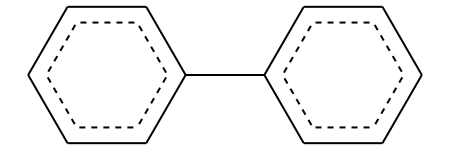

In [288]:
Chem.MolFromSmarts(remaining2_mcs)

In [290]:
from rdkit.Chem.Scaffolds import MurckoScaffold

In [293]:
steroids = exclusions[exclusions['Tag_numeric'] ==2]

In [295]:
steroid_smiles = [Chem.MolFromSmiles(e) for e in steroids['SMILES']]

In [297]:
steroid_MCS = rdFMCS.FindMCS(steroid_smiles)

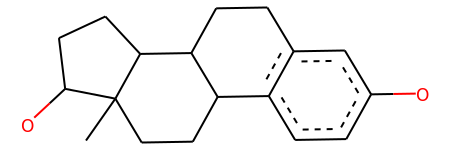

In [299]:
Chem.MolFromSmarts(steroid_MCS.smartsString)

In [325]:
hpcs = exclusions[exclusions['Tag_numeric'] ==3]

In [330]:
test = hpcs['Kroes.TTC.decision.tree.explanation.x'].tolist()[0]

In [339]:
test

'Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_genN,SA4_genN,SA5_genN,SA6_genN,SA7_genN,SA8_genN,SA9_genN,SA10_genN,SA11_genN,SA12_genN,SA13_genN,SA14_genN,SA15_genN,SA16_genN,SA18_genN,SA19_genN,SA21_genY,SA22_genN,SA23_genN,SA24_genN,SA25_genN,SA26_genN,SA27_genN,SA28_genN,SA28bis_genN,SA28ter_genN,SA29_genN,SA30_genN,SA37_genN,SA38_genN,SA39_gen_and_nogenN,Q2Y,Q3Y'

In [332]:
import re

In [338]:
re.findall(r'\w+genY',test)

#[m.group(0) for l in item_list1 for m in [regex.search(l)] if m]

['SA21_genY']

In [342]:
prog = re.compile(r'\w+genY')
result = prog.search(test)

In [343]:
result

<_sre.SRE_Match object; span=(194, 203), match='SA21_genY'>

In [350]:
fired_alerts = [m.group(0) for l in hpcs['Kroes.TTC.decision.tree.explanation.x'] for m in [prog.search(l)] if m]

In [359]:
def removeandreturn(a):
    c = a[-1]
    a = a[:-1]
    return a

In [361]:
removeandreturn('SA21_genY')

'SA21_gen'

In [363]:
fired_alerts = [removeandreturn(a) for a in fired_alerts]

In [364]:
hpcs['alerts_fired'] = fired_alerts

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [496]:
hpcs.head()

,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015,P_subs,alerts_fired,Fired_Alert_Names
196,DTXSID2020210,Butyl-N-(4-hydroxybutyl)nitrosamine,3817-11-6,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,Y,-,-,Y,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups
197,DTXSID7020213,N-Butyl-N'-nitro-N-nitrosoguanidine,13010-08-7,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups
198,DTXSID1020352,Cupferron,135-20-6,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,Y,-,-,Y,Y,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups
199,DTXSID0020527,Dinitrosopiperazine,140-79-4,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups
200,DTXSID8020593,1-Ethyl-1-nitrosourea,759-73-9,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,Y,-,-,Y,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups


In [346]:
xls3 = pd.ExcelFile(raw_dir+'kroes_gentox_alerts_120619.xlsx')

In [347]:
xls3.sheet_names

['kroes_120619']

In [348]:
gentox_alerts = xls3.parse('kroes_120619')

In [355]:
gentox_alerts.head()

,Alerts(genotoxic),Alert_Name,
0,SA1_gen,Acyl halides,
1,SA2_gen,Alkyl (C<5) or benzyl ester of sulphonic or ph...,
2,SA3_gen,N-methylol derivatives,
3,SA4_gen,Monohaloalkene,
4,SA5_gen,S or N mustard,


In [353]:
alert_dict = { k:v for (k,v) in zip(gentox_alerts['Alerts(genotoxic)'], gentox_alerts['Alert_Name'])}

In [354]:
alert_dict

{'SA1_gen': 'Acyl halides',
 'SA2_gen': 'Alkyl (C<5) or benzyl ester of sulphonic or phosphonic acid',
 'SA3_gen': 'N-methylol derivatives',
 'SA4_gen': 'Monohaloalkene',
 'SA5_gen': 'S or N mustard',
 'SA6_gen': 'Propiolactones and propiosultones',
 'SA7_gen': 'Epoxides and aziridines',
 'SA8_gen': 'Aliphatic halogens',
 'SA9_gen': 'Alkyl nitrite',
 'SA10_gen': 'a,b unsaturated carbonyls',
 'SA11_gen': 'Simple aldehyde',
 'SA12_gen': 'Quinones',
 'SA13_gen': 'Hydrazine',
 'SA14_gen': 'Aliphatic azo and azoxy',
 'SA15_gen': 'Isocyanate and isothiocyanate groups',
 'SA16_gen': 'Alkyl carbamate and thiocarbamate',
 'SA18_gen': 'Polycyclic Aromatic Hydrocarbons',
 'SA19_gen': 'Heterocyclic Polycyclic Aromatic Hydrocarbons',
 'SA21_gen': 'Alkyl and aryl N-nitroso groups',
 'SA22_gen': 'Azide and triazene groups',
 'SA23_gen': 'Aliphatic N-nitro',
 'SA24_gen': 'a,b unsaturated alkoxy',
 'SA25_gen': 'Aromatic nitroso group',
 'SA26_gen': 'Aromatic ring N-oxide',
 'SA27_gen': 'Nitro aromatic'

In [378]:
fired_alerts_names = [alert_dict[k] for k in hpcs['alerts_fired'] if k in alert_dict]
hpcs['Fired_Alert_Names'] = fired_alerts_names

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [380]:
hpcs['Fired_Alert_Names'].unique()

array(['Alkyl and aryl N-nitroso groups', 'Aliphatic halogens',
       'Aliphatic N-nitro', 'Aromatic diazo'], dtype=object)

In [382]:
hpcs[(hpcs['Fired_Alert_Names'] == 'Aliphatic halogens') |(hpcs['Fired_Alert_Names'] == 'Aliphatic N-nitro') ]

,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,TOXCAST,EDSP21LIST1,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015,P_subs,alerts_fired,Fired_Alert_Names
220,DTXSID8022743,Carmustine,154-93-8,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,Y,-,-,-,False,SA8_gen,Aliphatic halogens
221,DTXSID2023222,Lomustine,13010-47-4,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,Y,-,-,-,False,SA8_gen,Aliphatic halogens
222,DTXSID4024222,Nitroguanidine,556-88-7,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,Y,-,-,-,False,SA23_gen,Aliphatic N-nitro
225,DTXSID8031603,Semustine,13909-09-6,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,Y,-,-,-,False,SA8_gen,Aliphatic halogens
226,DTXSID0045179,Nimustine,42471-28-3,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,-,-,False,SA8_gen,Aliphatic halogens
228,DTXSID9024142,Cyclonite,121-82-4,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,Y,Y,-,-,-,False,SA23_gen,Aliphatic N-nitro
230,DTXSID5040540,L-Nitroarginine methyl ester,50903-99-6,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,-,-,False,SA23_gen,Aliphatic N-nitro


In [386]:
hpcs[hpcs['PREFERRED_NAME']=='Nimustine' ]['Kroes.TTC.decision.tree.explanation.x'].tolist()

['Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_genN,SA4_genN,SA5_genN,SA6_genN,SA7_genN,SA8_genY,SA9_genN,SA10_genN,SA11_genN,SA12_genN,SA13_genN,SA14_genN,SA15_genN,SA16_genN,SA18_genN,SA19_genN,SA21_genY,SA22_genN,SA23_genN,SA24_genN,SA25_genN,SA26_genN,SA27_genN,SA28_genY,SA28bis_genN,SA28ter_genN,SA29_genN,SA30_genN,SA37_genN,SA38_genN,SA39_gen_and_nogenN,Q2Y,Q3Y']

In [387]:
prog = re.compile(r'\w+genY')

In [522]:
all_fired_alerts = [prog.findall(m) for m in hpcs['Kroes.TTC.decision.tree.explanation.x']]

In [523]:
type(all_fired_alerts[1])

list

In [524]:
all_fired_alerts

[['SA21_genY'],
 ['SA21_genY', 'SA23_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY', 'SA23_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA21_genY'],
 ['SA8_genY', 'SA21_genY'],
 ['SA8_genY', 'SA21_genY'],
 ['SA23_genY'],
 ['SA29_genY'],
 ['SA29_genY'],
 ['SA8_genY', 'SA21_genY'],
 ['SA8_genY', 'SA21_genY', 'SA28_genY'],
 ['SA21_genY'],
 ['SA23_genY'],
 ['SA21_genY', 'SA27_genY'],
 ['SA23_genY']]

In [656]:
all_fired_alerts_temp = [','.join(e) for e in all_fired_alerts]

In [657]:
all_fired_alerts_temp

['SA21_genY',
 'SA21_genY,SA23_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY,SA23_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA21_genY',
 'SA8_genY,SA21_genY',
 'SA8_genY,SA21_genY',
 'SA23_genY',
 'SA29_genY',
 'SA29_genY',
 'SA8_genY,SA21_genY',
 'SA8_genY,SA21_genY,SA28_genY',
 'SA21_genY',
 'SA23_genY',
 'SA21_genY,SA27_genY',
 'SA23_genY']

In [658]:
#temp1 = [e[:-1] for e in all_fired_alerts_temp]
all_fired_alerts_temp = [e.replace('Y','') for e in all_fired_alerts_temp]
hpcs['all_fired_alerts'] = all_fired_alerts_temp
hpcs.head()

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015,P_subs,alerts_fired,Fired_Alert_Names,all_fired_alerts,alert_names_all
196,DTXSID2020210,Butyl-N-(4-hydroxybutyl)nitrosamine,3817-11-6,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,Y,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups,SA21_gen,Alkyl and aryl N-nitroso groups
197,DTXSID7020213,N-Butyl-N'-nitro-N-nitrosoguanidine,13010-08-7,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups,"SA21_gen,SA23_gen",None
198,DTXSID1020352,Cupferron,135-20-6,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,Y,Y,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups,SA21_gen,Alkyl and aryl N-nitroso groups
199,DTXSID0020527,Dinitrosopiperazine,140-79-4,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups,SA21_gen,Alkyl and aryl N-nitroso groups
200,DTXSID8020593,1-Ethyl-1-nitrosourea,759-73-9,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,Y,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups,SA21_gen,Alkyl and aryl N-nitroso groups


In [659]:
hpcs['all_fired_alerts'].unique()

array(['SA21_gen', 'SA21_gen,SA23_gen', 'SA8_gen,SA21_gen', 'SA23_gen',
       'SA29_gen', 'SA8_gen,SA21_gen,SA28_gen', 'SA21_gen,SA27_gen'],
      dtype=object)

In [660]:
alert_names = [alert_dict.get(k, None) for k in hpcs['all_fired_alerts']]
hpcs['alert_names_all'] = alert_names

/home/gpatlewi/anaconda3/envs/my-mordred/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [661]:
temp = hpcs[hpcs['alert_names_all'].isnull()]['all_fired_alerts'].tolist()

In [662]:
temp

['SA21_gen,SA23_gen',
 'SA21_gen,SA23_gen',
 'SA8_gen,SA21_gen',
 'SA8_gen,SA21_gen',
 'SA8_gen,SA21_gen',
 'SA8_gen,SA21_gen,SA28_gen',
 'SA21_gen,SA27_gen']

In [663]:
def refresh_dict(s):
    a = s.split(',')
    return a

In [665]:
refresh_dict('SA21_gen,SA23_gen')

['SA21_gen', 'SA23_gen']

In [666]:
temp2 = [refresh_dict(e) for e in temp]

In [671]:
temp2

[['SA21_gen', 'SA23_gen'],
 ['SA21_gen', 'SA23_gen'],
 ['SA8_gen', 'SA21_gen'],
 ['SA8_gen', 'SA21_gen'],
 ['SA8_gen', 'SA21_gen'],
 ['SA8_gen', 'SA21_gen', 'SA28_gen'],
 ['SA21_gen', 'SA27_gen']]

In [667]:
temp3 = [item for sub in temp2 for item in sub]

In [668]:
temp3

['SA21_gen',
 'SA23_gen',
 'SA21_gen',
 'SA23_gen',
 'SA8_gen',
 'SA21_gen',
 'SA8_gen',
 'SA21_gen',
 'SA8_gen',
 'SA21_gen',
 'SA8_gen',
 'SA21_gen',
 'SA28_gen',
 'SA21_gen',
 'SA27_gen']

In [669]:
[e for e in temp3 if e in list(alert_dict.keys())]

['SA21_gen',
 'SA23_gen',
 'SA21_gen',
 'SA23_gen',
 'SA8_gen',
 'SA21_gen',
 'SA8_gen',
 'SA21_gen',
 'SA8_gen',
 'SA21_gen',
 'SA8_gen',
 'SA21_gen',
 'SA28_gen',
 'SA21_gen',
 'SA27_gen']

In [612]:
[e for e in temp2][0]

['SA21_gen', ' SA23_gen']

In [670]:
[alert_dict[k] for k in temp3 if k in alert_dict]

['Alkyl and aryl N-nitroso groups',
 'Aliphatic N-nitro',
 'Alkyl and aryl N-nitroso groups',
 'Aliphatic N-nitro',
 'Aliphatic halogens',
 'Alkyl and aryl N-nitroso groups',
 'Aliphatic halogens',
 'Alkyl and aryl N-nitroso groups',
 'Aliphatic halogens',
 'Alkyl and aryl N-nitroso groups',
 'Aliphatic halogens',
 'Alkyl and aryl N-nitroso groups',
 'Primary aromatic amine, hydroxyl amine and its derived esters (with restrictions)',
 'Alkyl and aryl N-nitroso groups',
 'Nitro aromatic']

In [686]:
hpcs[hpcs['alert_names_all'].isnull()]

,DTXSID,PREFERRED_NAME,CASRN,Kroes.TTC.decision.tree.x,Kroes.TTC.decision.tree.explanation.x,New.decision.tree,Tag,Inorganic_filter,Tag_numeric,inorg_numeric,...,EDSP21LIST2,EDSPUOC,ERMODEL,WETMORE2012,WETMORE2015,P_subs,alerts_fired,Fired_Alert_Names,all_fired_alerts,alert_names_all
197,DTXSID7020213,N-Butyl-N'-nitro-N-nitrosoguanidine,13010-08-7,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups,"SA21_gen,SA23_gen",None
201,DTXSID2020846,Methylnitronitrosoguanidine,70-25-7,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups,"SA21_gen,SA23_gen",None
220,DTXSID8022743,Carmustine,154-93-8,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,Y,-,-,-,False,SA8_gen,Aliphatic halogens,"SA8_gen,SA21_gen",None
221,DTXSID2023222,Lomustine,13010-47-4,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,Y,-,-,-,False,SA8_gen,Aliphatic halogens,"SA8_gen,SA21_gen",None
225,DTXSID8031603,Semustine,13909-09-6,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,Y,-,-,-,False,SA8_gen,Aliphatic halogens,"SA8_gen,SA21_gen",None
226,DTXSID0045179,Nimustine,42471-28-3,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,-,-,-,-,False,SA8_gen,Aliphatic halogens,"SA8_gen,SA21_gen,SA28_gen",None
229,DTXSID4021002,N-Nitroso-N-methyl-4-nitroaniline,943-41-9,Risk assessment requires compound-specific tox...,"Q1N,Alerts(genotoxic)Y,SA1_genN,SA2_genN,SA3_g...",0,HPC,False,3,0,...,-,Y,-,-,-,False,SA21_gen,Alkyl and aryl N-nitroso groups,"SA21_gen,SA27_gen",None


In [673]:
alert_dict['SA28_gen']

'Primary aromatic amine, hydroxyl amine and its derived esters (with restrictions)'

In [674]:
alert_dict['SA27_gen']

'Nitro aromatic'

In [675]:
alert_dict['SA21_gen']

'Alkyl and aryl N-nitroso groups'

In [699]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(processed_dir+'exclusions_130619.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
exclusions.to_excel(writer, sheet_name = 'NA for TTC')
inorgs_all.to_excel(writer, sheet_name = 'Inorgs_126')
remaining.to_excel(writer, sheet_name = 'remaining QY1 less dioxin')
onlyp.to_excel(writer, sheet_name = 'P containing_51')
steroids.to_excel(writer, sheet_name = 'Steroids_12')
hpcs.to_excel(writer, sheet_name='HPC')
pd.DataFrame([alert_dict], columns = alert_dict.keys()).T.to_excel(writer, sheet_name = 'potential alerts')
# Close the Pandas Excel writer and output the Excel file.
writer.save()